## MANOVA

We’ll use the **Salaries dataset** , to determine if there are significant differences in salary, years since PhD, and years of service based on the rank, discipline, and sex of the faculty members.

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv"
salaries = pd.read_csv(url)

print(salaries.head())

   rownames      rank discipline  yrs.since.phd  yrs.service   sex  salary
0         1      Prof          B             19           18  Male  139750
1         2      Prof          B             20           16  Male  173200
2         3  AsstProf          B              4            3  Male   79750
3         4      Prof          B             45           39  Male  115000
4         5      Prof          B             40           41  Male  141500


### Data descriptions

In [64]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

print("Dataset Info:")
salaries.info()
print("\nSummary Statistics:")
print(salaries.describe())

salaries['rank'] = salaries['rank'].astype('category')
salaries['discipline'] = salaries['discipline'].astype('category')
salaries['sex'] = salaries['sex'].astype('category')
salaries = salaries.rename(columns={'yrs.since.phd': 'yrs_since_phd', 'yrs.service': 'yrs_service'})

salaries = salaries.dropna()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rownames       397 non-null    int64 
 1   rank           397 non-null    object
 2   discipline     397 non-null    object
 3   yrs.since.phd  397 non-null    int64 
 4   yrs.service    397 non-null    int64 
 5   sex            397 non-null    object
 6   salary         397 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 21.8+ KB

Summary Statistics:
         rownames  yrs.since.phd  yrs.service         salary
count  397.000000     397.000000   397.000000     397.000000
mean   199.000000      22.314861    17.614610  113706.458438
std    114.748275      12.887003    13.006024   30289.038695
min      1.000000       1.000000     0.000000   57800.000000
25%    100.000000      12.000000     7.000000   91000.000000
50%    199.000000      21.000000    16.000000  107300.000

# Visualisations

## Salaries distribution

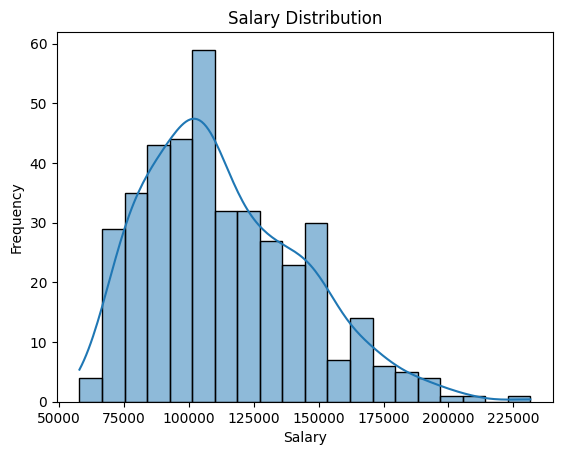

In [65]:
sns.histplot(salaries['salary'], bins=20, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

## Boxplots

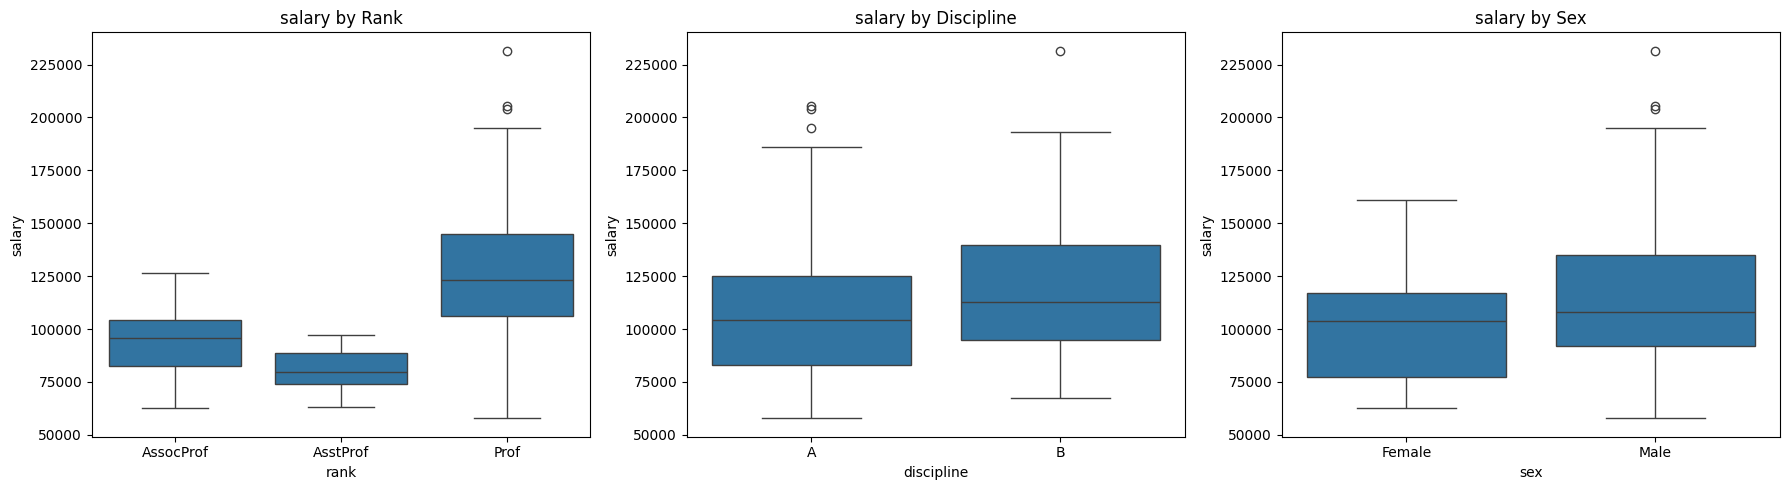

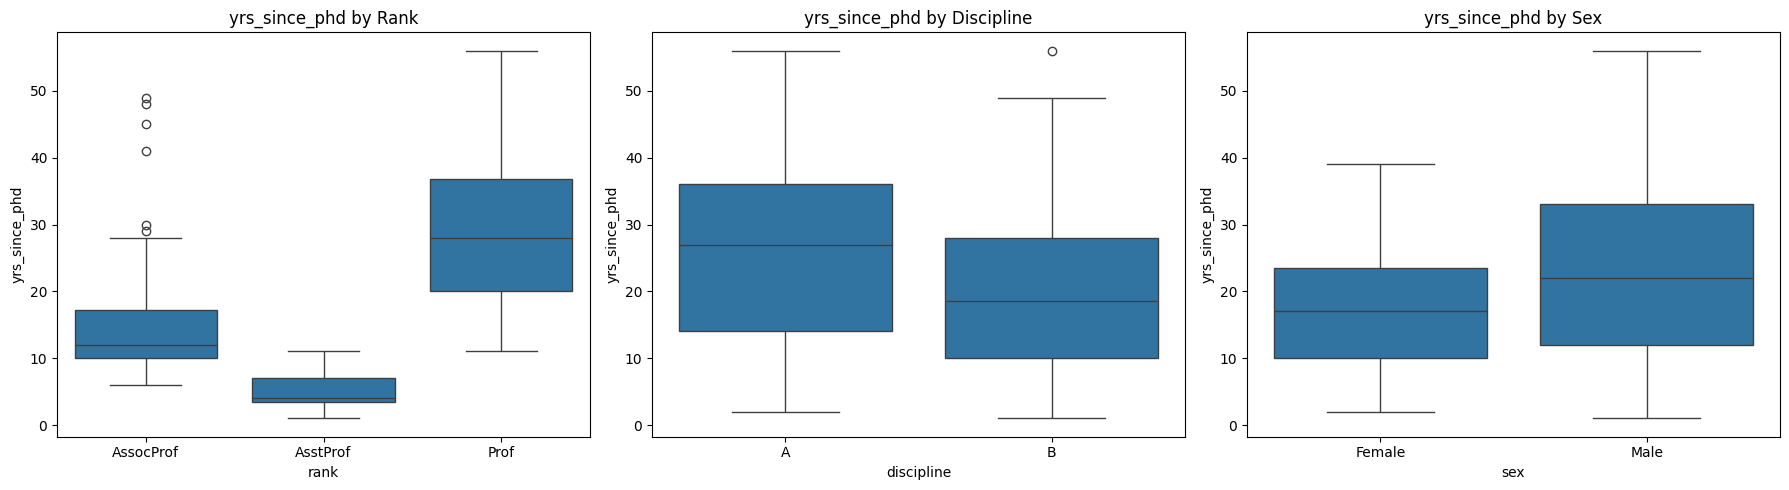

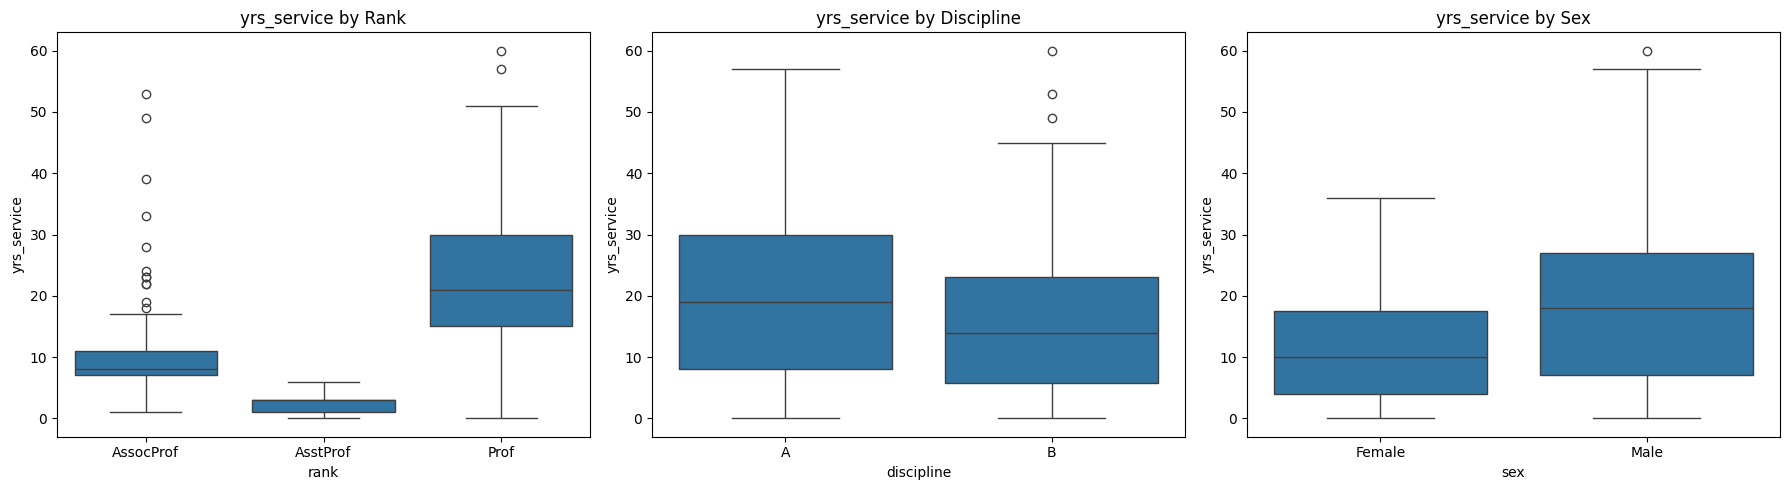

In [66]:
for col in ['salary', 'yrs_since_phd', 'yrs_service']:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    sns.boxplot(x='rank', y=col, data=salaries, ax=axes[0])
    axes[0].set_title(f"{col} by Rank")
    
    sns.boxplot(x='discipline', y=col, data=salaries, ax=axes[1])
    axes[1].set_title(f"{col} by Discipline")
    
    sns.boxplot(x='sex', y=col, data=salaries, ax=axes[2])
    axes[2].set_title(f"{col} by Sex")
    
    plt.tight_layout()
    plt.show()


## Pairplots

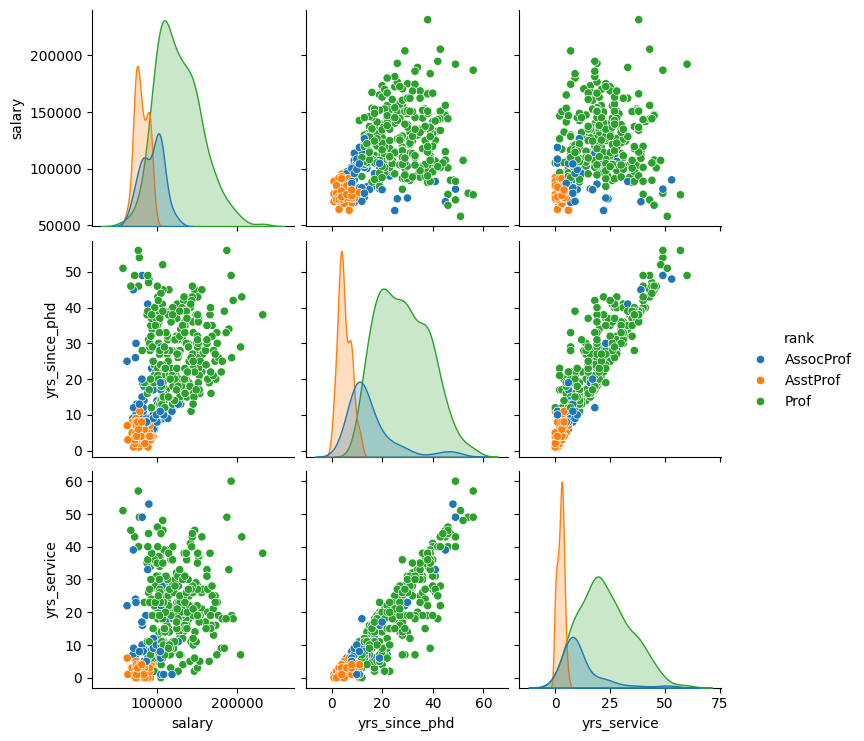

In [67]:
sns.pairplot(salaries, hue='rank', vars=['salary', 'yrs_since_phd', 'yrs_service'])
plt.show()

## Violin plots

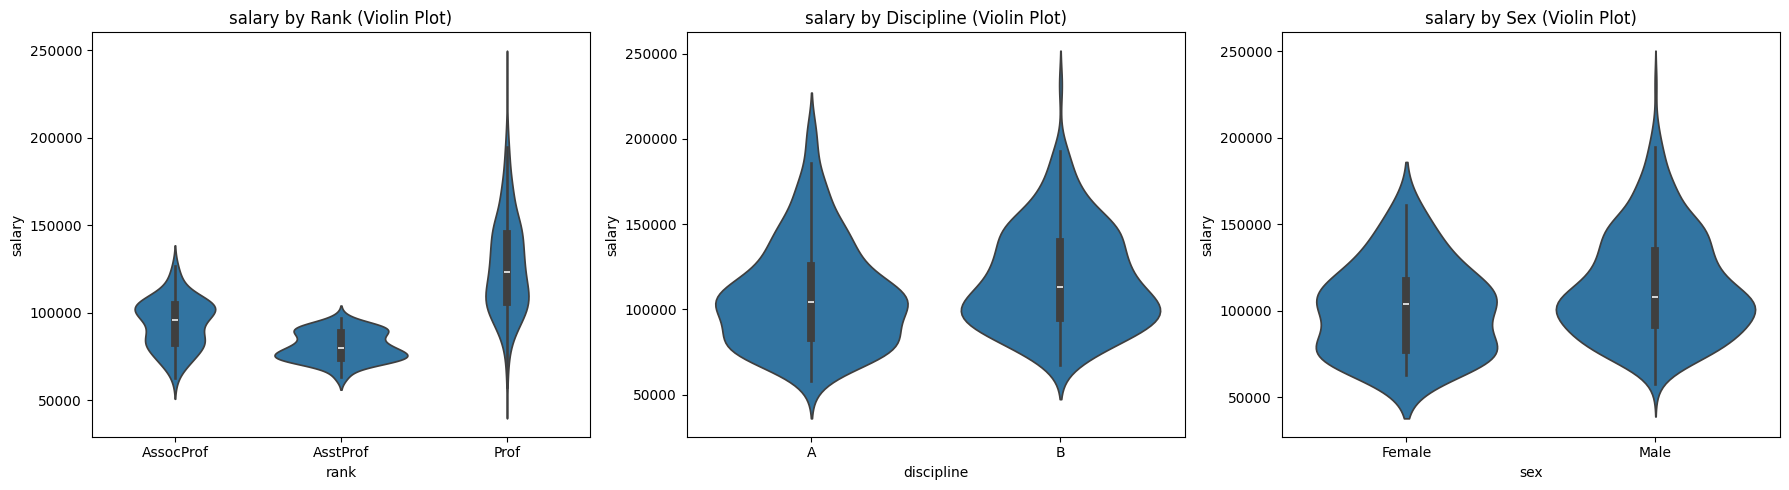

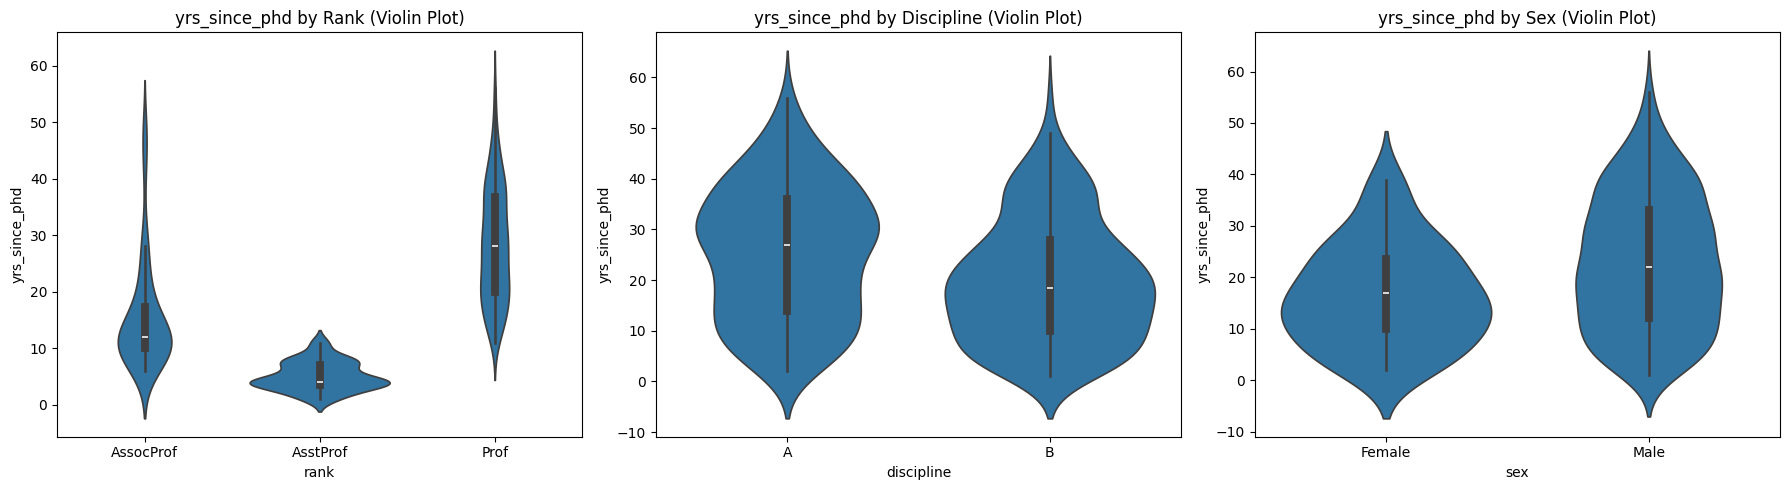

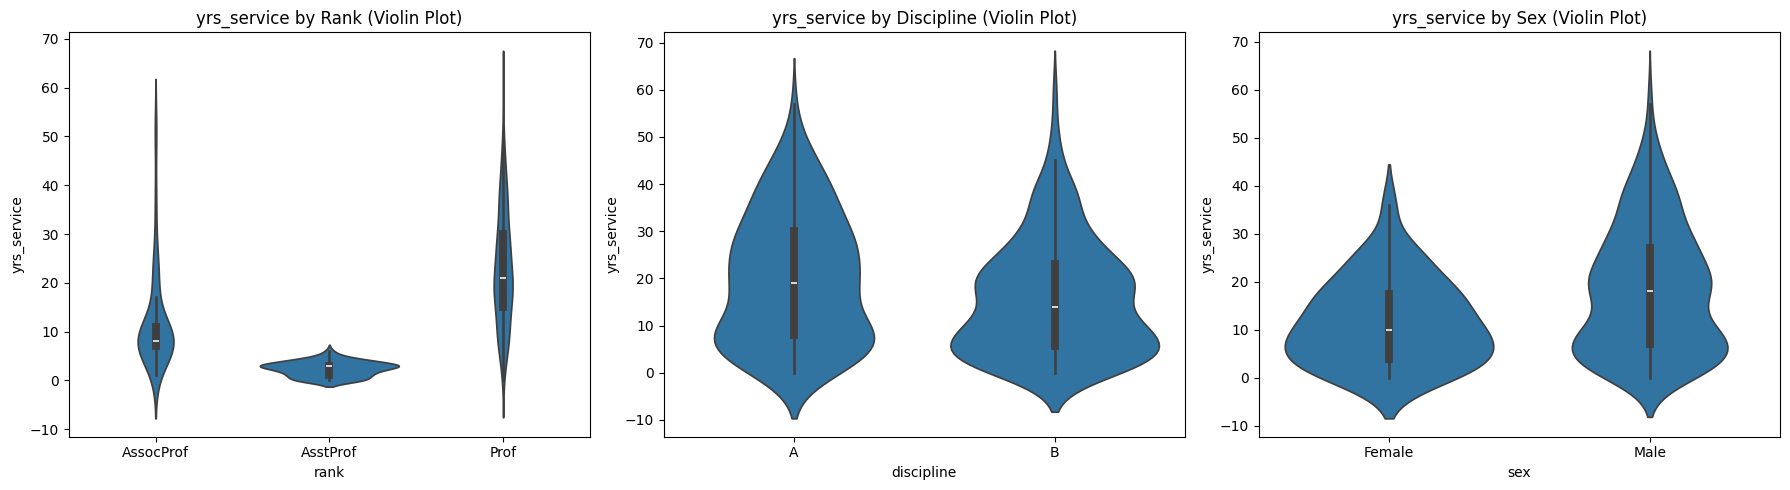

In [68]:
for col in ['salary', 'yrs_since_phd', 'yrs_service']:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    sns.violinplot(x='rank', y=col, data=salaries, ax=axes[0])
    axes[0].set_title(f"{col} by Rank (Violin Plot)")
    
    sns.violinplot(x='discipline', y=col, data=salaries, ax=axes[1])
    axes[1].set_title(f"{col} by Discipline (Violin Plot)")
    
    sns.violinplot(x='sex', y=col, data=salaries, ax=axes[2])
    axes[2].set_title(f"{col} by Sex (Violin Plot)")
    
    plt.tight_layout()
    plt.show()

# Assumptions

## Normality

In [89]:
import scipy.stats as stats
from scipy.stats import shapiro
import numpy as np

def shapiro_test(group, column):
    stat, p_value = stats.shapiro(group[column])
    return pd.Series({'W': stat, 'p_value': p_value})

for col in ['salary', 'yrs_since_phd', 'yrs_service']:
    shapiro_results = salaries.groupby(['sex', 'discipline', 'rank']).apply(shapiro_test, column=col).reset_index()
    print(f"{col}")
    print(shapiro_results)



salary
       sex discipline       rank         W   p_value
0   Female          A  AssocProf  0.862555  0.269460
1   Female          A   AsstProf  0.869869  0.225684
2   Female          A       Prof  0.933578  0.549195
3   Female          B  AssocProf  0.634562  0.001173
4   Female          B   AsstProf  0.889298  0.353583
5   Female          B       Prof  0.973714  0.922980
6     Male          A  AssocProf  0.878440  0.011282
7     Male          A   AsstProf  0.940885  0.300046
8     Male          A       Prof  0.952176  0.000259
9     Male          B  AssocProf  0.966780  0.415597
10    Male          B   AsstProf  0.941189  0.045788
11    Male          B       Prof  0.978489  0.043536
yrs_since_phd
       sex discipline       rank         W   p_value
0   Female          A  AssocProf  0.839796  0.194808
1   Female          A   AsstProf  0.957542  0.800612
2   Female          A       Prof  0.960390  0.813805
3   Female          B  AssocProf  0.808772  0.070382
4   Female          B   A

C:\Users\tsbla\AppData\Local\Temp\ipykernel_9116\3022705835.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shapiro_results = salaries.groupby(['sex', 'discipline', 'rank']).apply(shapiro_test, column=col).reset_index()
C:\Users\tsbla\AppData\Local\Temp\ipykernel_9116\3022705835.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shapiro_results = salaries.groupby(['sex', 'discipline', 'rank']).apply(shapiro_test, column=col).reset_index()
C:\Users\tsbla\AppData\Local\Temp\ipykernel_9116\3022705835.py:

Performing the Shapiro-Wilk we have identified groups with violated normality. It appears like there is a couple of them but due to ANOVA robustness to violation's of normality we can assume that our conclucisons will be accurate.

## Homogenity of variance

In [70]:
from scipy.stats import levene

grouped_data_Salaries = salaries.groupby(['sex', 'rank','discipline'])['salary'].apply(list)

stat, p_value = levene(*grouped_data_Salaries)

print(f"Levene's test statistic for salaries: {stat}")
print(f"p-value: {p_value}")

grouped_data_YearsSincePHD = salaries.groupby(['sex', 'rank','discipline'])['yrs_since_phd'].apply(list)

stat, p_value = levene(*grouped_data_YearsSincePHD)
print(f"Levene's test statistic for yrs_since_phd: {stat}")
print(f"p-value: {p_value}")

grouped_data_YearsInService = salaries.groupby(['sex', 'rank','discipline'])['yrs_service'].apply(list)

stat, p_value = levene(*grouped_data_YearsInService)
print(f"Levene's test statistic for yrs.service: {stat}")
print(f"p-value: {p_value}")


Levene's test statistic for salaries: 9.046974891330155
p-value: 2.063886339073554e-14
Levene's test statistic for yrs_since_phd: 6.214366190368173
p-value: 1.9340506832323076e-09
Levene's test statistic for yrs.service: 8.13289047991291
p-value: 8.041227347084751e-13


C:\Users\tsbla\AppData\Local\Temp\ipykernel_9116\1630049670.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_Salaries = salaries.groupby(['sex', 'rank','discipline'])['salary'].apply(list)
C:\Users\tsbla\AppData\Local\Temp\ipykernel_9116\1630049670.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_YearsSincePHD = salaries.groupby(['sex', 'rank','discipline'])['yrs_since_phd'].apply(list)
C:\Users\tsbla\AppData\Local\Temp\ipykernel_9116\1630049670.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

#### As a result of performing the leavene test we see that the variances are homogeanous for all groups

# MANOVA

We are perform the MANOVA analysis using rank, discipline, and sex as the independent variables and salary, yrs.since.phd, and yrs.service as the dependent variables.

In [71]:
from statsmodels.multivariate.manova import MANOVA

manova = MANOVA.from_formula('salary + yrs_service + yrs_since_phd ~ sex + rank + discipline', data=salaries)
result = manova.mv_test()

print(result.summary())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.4925 3.0000 390.0000 133.9593 0.0000
         Pillai's trace 0.5075 3.0000 390.0000 133.9593 0.0000
 Hotelling-Lawley trace 1.0305 3.0000 390.0000 133.9593 0.0000
    Roy's greatest root 1.0305 3.0000 390.0000 133.9593 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
           sex           Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9879 3.0000 390.0000  1.5930 0.1906
          Pillai's trace 0.0121 3.0000 390.0000  1.5930 0.1906
  Hotelling

As we can see we have a significant results considering discipline, rank and interaction. We can omitt sex as it doesn't show a significant correlation.

# Post hoc tests


Tukey HSD Test for salary by rank:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1   group2    meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------------
AssocProf AsstProf -13100.4524 0.0047 -22818.7096 -3382.1952   True
AssocProf     Prof  32895.6715    0.0  25154.5071  40636.836   True
 AsstProf     Prof  45996.1239    0.0  38395.9413 53596.3066   True
-------------------------------------------------------------------


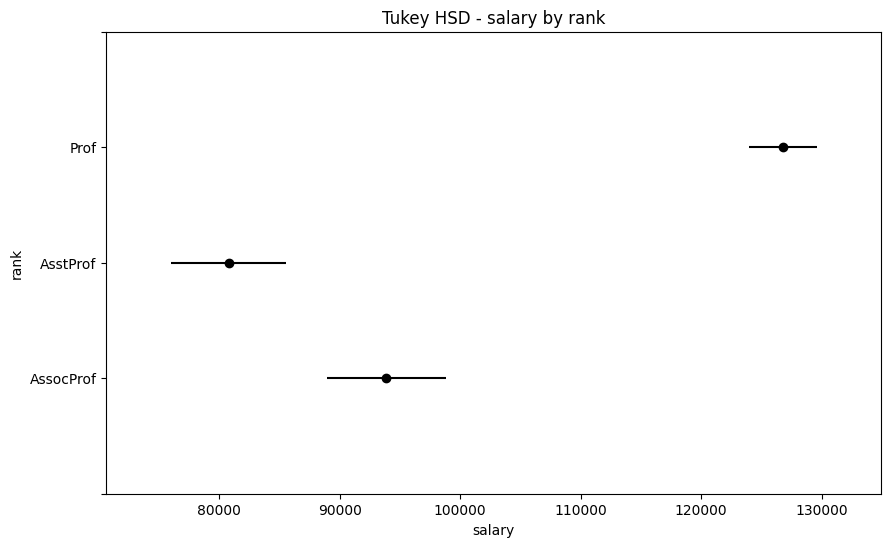


Tukey HSD Test for yrs_since_phd by rank:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2  meandiff p-adj  lower    upper  reject
---------------------------------------------------------
AssocProf AsstProf -10.3486   0.0 -14.1333  -6.564   True
AssocProf     Prof  12.8476   0.0   9.8329 15.8623   True
 AsstProf     Prof  23.1963   0.0  20.2365 26.1561   True
---------------------------------------------------------


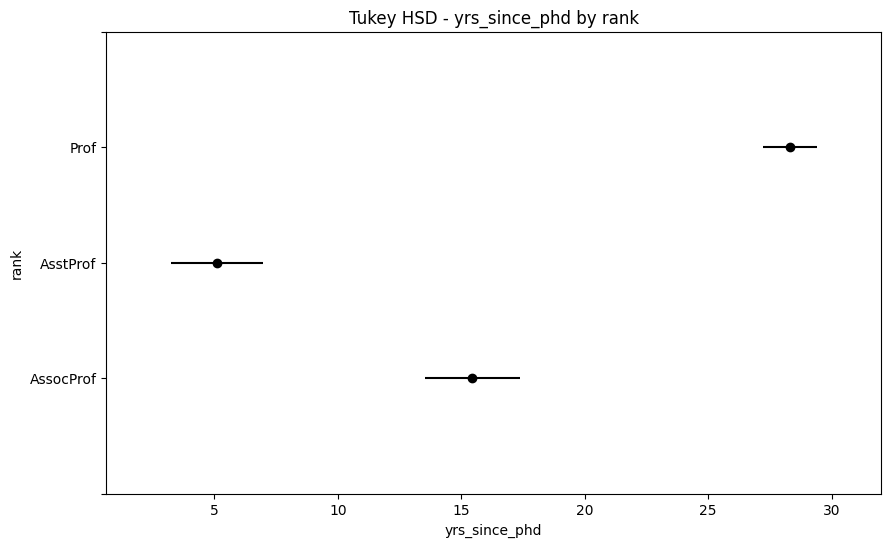


Tukey HSD Test for yrs_service by rank:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2  meandiff p-adj  lower    upper  reject
---------------------------------------------------------
AssocProf AsstProf    -9.58   0.0 -13.8343 -5.3256   True
AssocProf     Prof  10.8627   0.0   7.4738 14.2515   True
 AsstProf     Prof  20.4427   0.0  17.1155 23.7698   True
---------------------------------------------------------


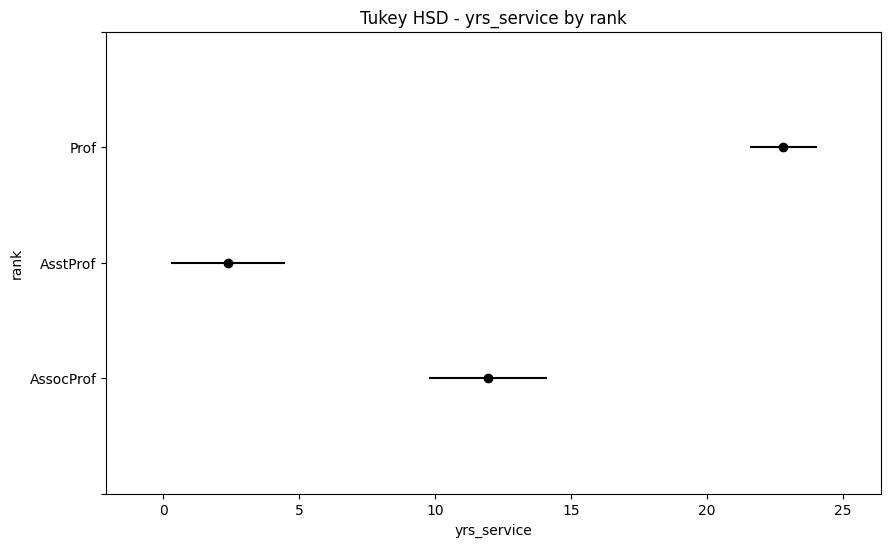


Tukey HSD Test for salary by discipline:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower     upper    reject
----------------------------------------------------------
     A      B 9480.2635 0.0018 3545.7002 15414.8268   True
----------------------------------------------------------


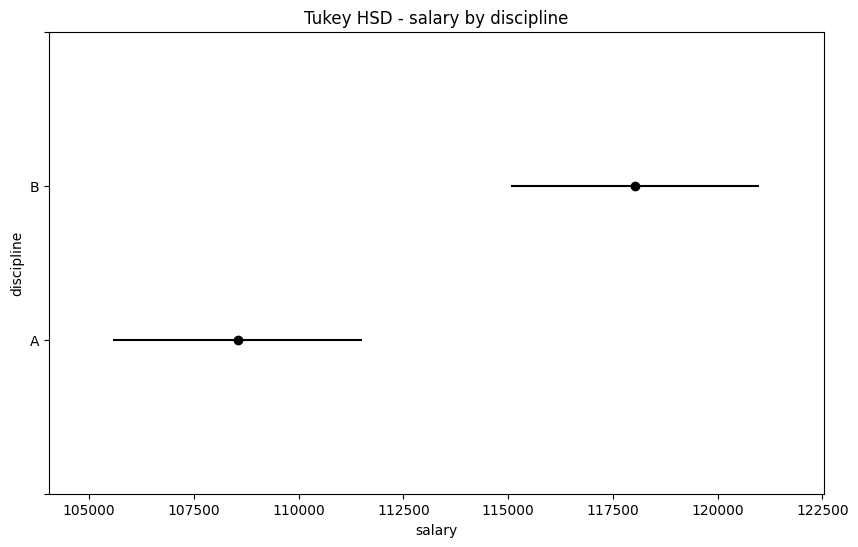


Tukey HSD Test for yrs_since_phd by discipline:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B  -5.6358   0.0 -8.1306 -3.1411   True
---------------------------------------------------


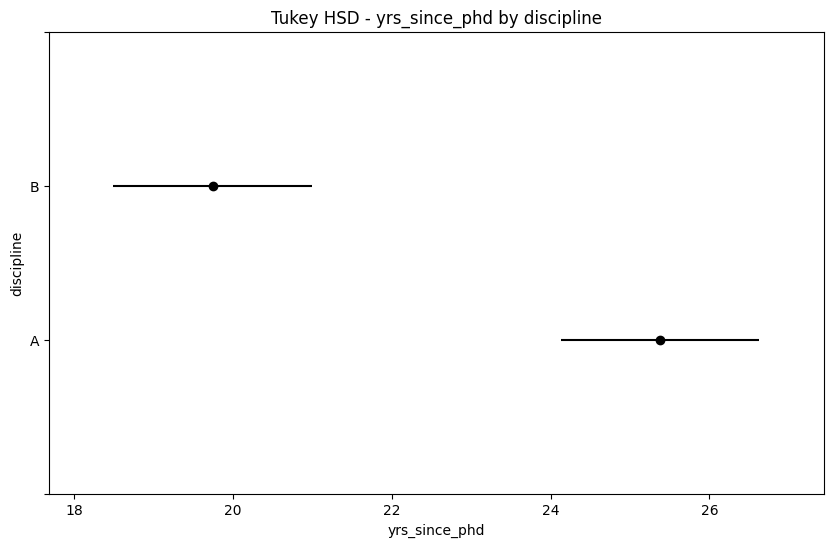


Tukey HSD Test for yrs_service by discipline:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B  -4.2929 0.001 -6.8376 -1.7482   True
---------------------------------------------------


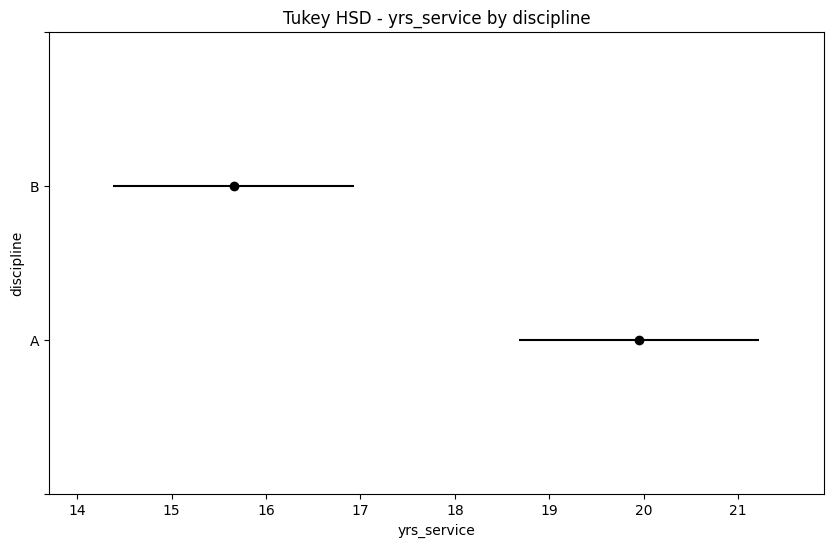

In [88]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def tukey_test(variable, factor):
    print(f"\nTukey HSD Test for {variable} by {factor}:")
    tukey = pairwise_tukeyhsd(endog=salaries[variable], groups=salaries[factor], alpha=0.05)
    print(tukey)
    tukey.plot_simultaneous()
    plt.title(f"Tukey HSD - {variable} by {factor}")
    plt.xlabel(f"{variable}")
    plt.ylabel(f"{factor}")
    plt.show()

for factor in ['rank', 'discipline']:
    for variable in ['salary', 'yrs_since_phd', 'yrs_service']:
        tukey_test(variable, factor)

Every test seems to give significant results

# Conclusions

From our MANOVA analysis we can stay that:

    1) Employees with a Profesor rank earn significantly higer salary than the Associated Professors, who earn 
    significantly more than the Assistant Professors.

    2) Employees with a Profesor rank have significantly higer time period since the PHD than Associated Professors, who significantly higer time period since the PHD than the Assistant Professors.

    3) Employees with a Profesor rank have significantly higer time period of service than Associated Professors, who significantly higer time period of service than the Assistant Professors

    4) Employess hired in a B discipline earn significantly more than employess hired in B

    5) Employess hired in a A discipline have significantly higer time period since the PHD than employess hired in B
    
    6) Employess hired in a B discipline higer time period of service than employess hired in B